In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path = '/mnt/data4/Abhishek/VPF/random/'

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [21]:
fid_data = []
random_data = []

#for filename in os.listdir(path):
#    if filename.startswith('vpf_MDgalaxies'):
#        _,vpf = np.load(os.path.join(path,filename))
#        _temp = np.concatenate((vpf,f[0]))
#        fid_data.append(_temp)


for filename in os.listdir(path):
    if filename.startswith('vpf_galaxies'):
        pos = extractIndex(filename)
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[pos]))
        random_data.append(_temp)


In [22]:
full_data = np.vstack((random_data))
del random_data
del fid_data
np.random.shuffle(full_data)

In [23]:
X_data = pd.DataFrame(full_data[:,24:-5])
y_data = pd.DataFrame(full_data[:,-5:])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [25]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [26]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([0.00307354, 0.00350203, 0.00266706, 0.05069958, 0.01176146])

In [27]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

0   -0.014728
1    0.009240
2    0.113420
3    4.302034
4    1.038366
dtype: float64


In [28]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [29]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [30]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.975382,14.097037,0.878266,0.959804,1.045213,13.056583,14.057934,0.952339,1.148384,0.896833
1,12.973577,14.033908,1.120758,1.007490,1.024414,13.008704,14.053881,1.159587,1.074525,0.898209
2,13.113582,14.014773,0.860059,0.884986,0.914544,13.108223,14.090922,0.855959,0.974448,0.891298
3,13.172252,14.014123,0.797082,1.351393,1.014827,13.135780,14.040382,0.771270,1.060283,0.968337
4,12.979669,14.149435,0.892978,0.830177,0.840470,13.045186,14.065157,0.953866,1.129515,0.836436
...,...,...,...,...,...,...,...,...,...,...
495,13.169712,14.127995,1.013054,0.978152,0.919522,13.103263,14.060737,0.963348,1.236926,0.880625
496,13.029042,13.994504,1.202876,0.933826,0.767886,13.016585,14.038856,1.179431,1.224403,0.919643
497,13.015266,14.013796,1.056441,1.188382,1.058305,13.057692,14.066187,1.107133,1.054682,0.903581
498,13.154761,14.000792,1.146855,1.178129,0.904296,13.092761,14.077720,1.083906,1.236458,0.866607


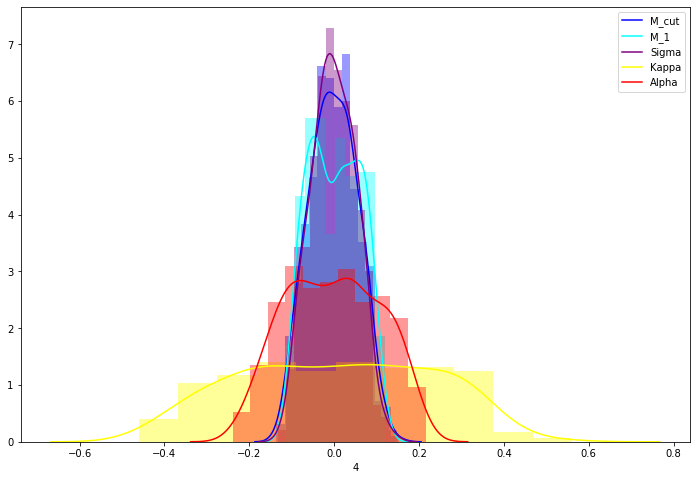

In [31]:
plot_error(y_rf,y_test)

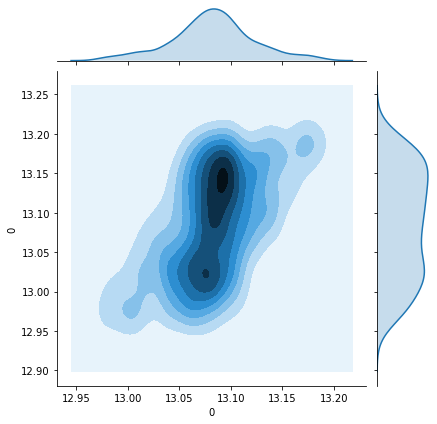

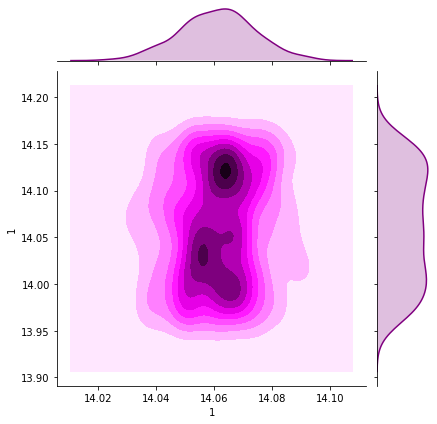

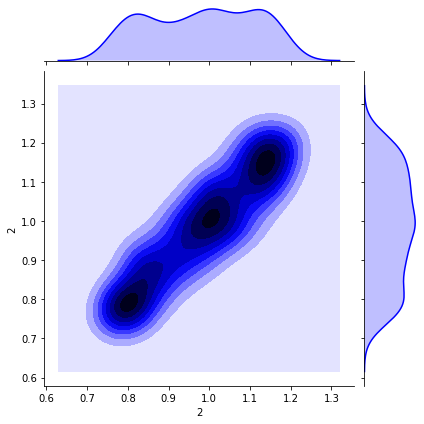

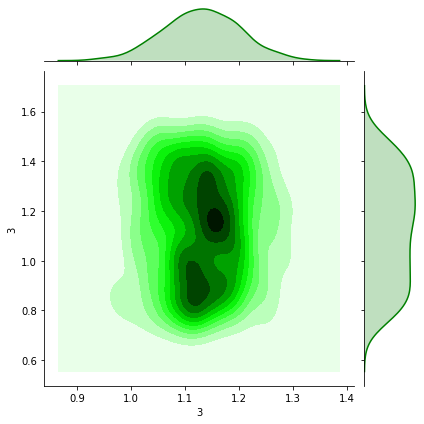

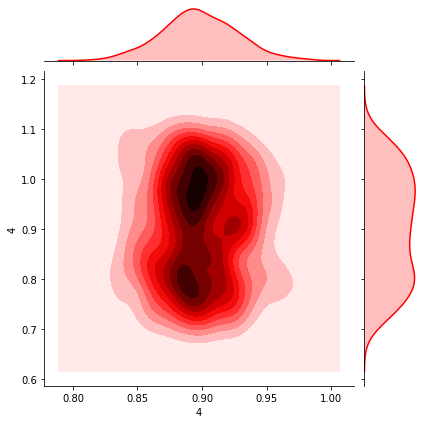

In [32]:
plot_corr(y_rf,y_test)

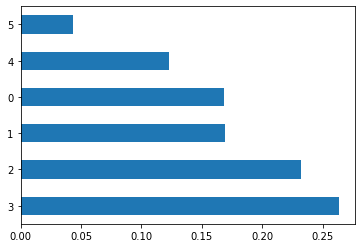

In [33]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [34]:
feat_importances.nlargest(10)

3    0.263984
2    0.232469
1    0.169255
0    0.168654
4    0.122604
5    0.043034
dtype: float64

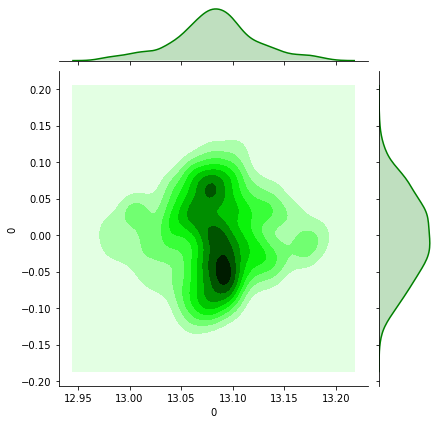

In [35]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

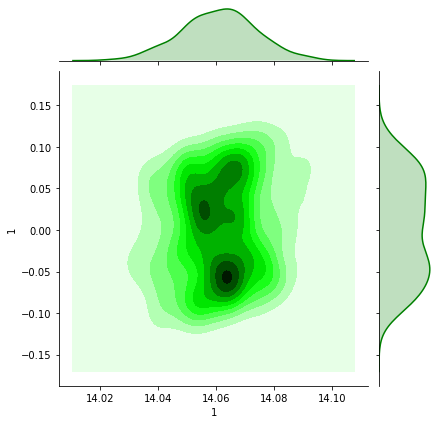

In [36]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

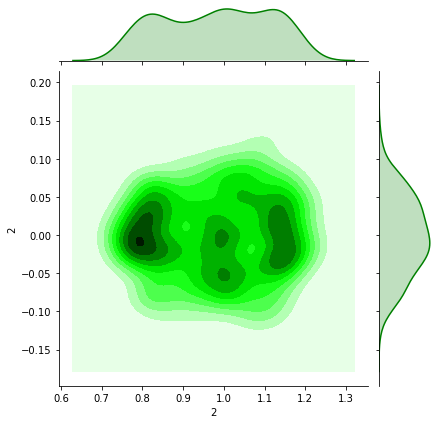

In [37]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

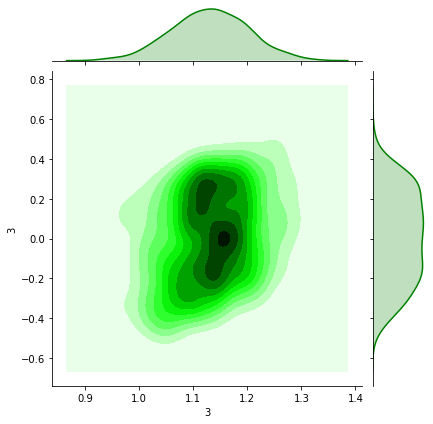

In [38]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

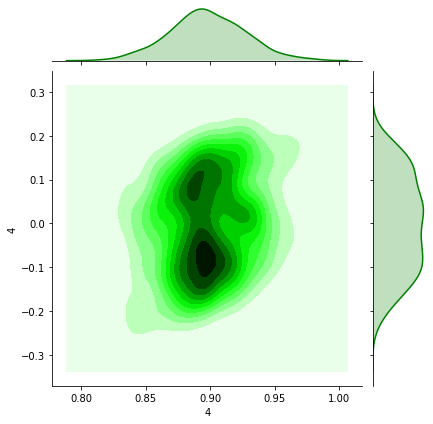

In [39]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [40]:

max_depth = 40
n_estimators = 250

In [41]:
'''
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
     """Return the average MAE over 5 CV folds of random forest model.
    
     Keyword argument:
     n_estimators -- the number of trees in the forest
     """
   #fit Random Forest Regressor
     reg_rf = RandomForestRegressor(
         n_estimators=n_estimators,
         criterion='mse',
         max_depth=None,
         min_samples_split=0.5,
         min_samples_leaf=1,
         min_weight_fraction_leaf=0.0,
         max_features='auto',
         max_leaf_nodes=None,
         min_impurity_decrease=0.0,
         min_impurity_split=None,
         bootstrap=True,
         oob_score=False,
         n_jobs=None,
         random_state=None,
         verbose=0,
         warm_start=False,
     )
     scores = -1 * cross_val_score(reg_rf, X_data, y_data,
                                   cv=4,
                                   scoring='neg_mean_absolute_error')
     return scores.mean()
'''

'\nfrom sklearn.model_selection import cross_val_score\n\ndef get_score(n_estimators):\n     """Return the average MAE over 5 CV folds of random forest model.\n    \n     Keyword argument:\n     n_estimators -- the number of trees in the forest\n     """\n   #fit Random Forest Regressor\n     reg_rf = RandomForestRegressor(\n         n_estimators=n_estimators,\n         criterion=\'mse\',\n         max_depth=None,\n         min_samples_split=0.5,\n         min_samples_leaf=1,\n         min_weight_fraction_leaf=0.0,\n         max_features=\'auto\',\n         max_leaf_nodes=None,\n         min_impurity_decrease=0.0,\n         min_impurity_split=None,\n         bootstrap=True,\n         oob_score=False,\n         n_jobs=None,\n         random_state=None,\n         verbose=0,\n         warm_start=False,\n     )\n     scores = -1 * cross_val_score(reg_rf, X_data, y_data,\n                                   cv=4,\n                                   scoring=\'neg_mean_absolute_error\')\n     

In [42]:
results = {}
for i in range(1,10):
     results[50*i] = get_score(50*i) # Your code here

NameError: name 'get_score' is not defined

In [ ]:
n_estimators_best = min(results, key=results.get)
print (n_estimators_best)

In [ ]:
plt.plot(list(results.keys()), list(results.values()))

In [ ]:
np.array(results.keys())

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,500,50)],
    "max_depth":[None,5,10,15,20,25,30],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters, cv=5)
clf.fit(X_train,y_train)


In [ ]:
sorted(clf.cv_results_.keys())

In [ ]:
grid = clf.predict(X_test)

In [ ]:
print (np.mean((grid - y_test)**2/(grid**2), axis=0))

In [ ]:

pd.concat([pd.DataFrame(y_test.reset_index(drop=True)),
                        pd.DataFrame(grid)], axis = 1)

In [ ]:
sns.jointplot(y_test.iloc[:,0],y_test.iloc[:,1],kind = "kde")
sns.jointplot(grid[:,0],grid[:,1],kind = 'kde',color='green')

In [ ]:
g = sns.PairGrid(pd.DataFrame())
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)

In [ ]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=1000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)

In [ ]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(10**X_test,y_test)

In [ ]:
y_multirf = pd.DataFrame(y_multirf)
y_test = pd.DataFrame(y_test)

In [ ]:
plot_corr(y_multirf,y_test)

In [ ]:
plot_error(y_multirf,y_test)